# TRABAJO PRÁCTICO INTEGRADOR N°1

## Sistema de Análisis de Documentos Digitalizados

---

**Información del Estudiante:**
- **Nombre y Apellido:** [COMPLETAR]
- **Fecha de Entrega:** 24 de Septiembre de 2025
- **Materia:** Procesamiento de Imágenes - IFTS24

---

### Objetivo

Desarrollar un sistema básico de análisis automático de documentos digitalizados que integre las técnicas de procesamiento de imágenes estudiadas en el curso.

### Estructura del Trabajo

| Parte | Descripción | Peso |
|-------|-------------|------|
| **1** | Fundamentos Teóricos | 20% |
| **2** | Setup del Entorno | 15% |
| **3** | Análisis de Imágenes | 35% |
| **4** | Preprocessing Básico | 30% |

**Dataset requerido:** 3 imágenes de documentos con diferentes características (buena calidad, rotada, con problemas de iluminación)

---

# PARTE 1: Fundamentos Teóricos

## ¿Por qué Cuadernos Interactivos para IA y Ciencias de Datos?

### Diferencias Metodológicas Fundamentales

El trabajo en inteligencia artificial y ciencias de datos requiere un enfoque metodológico diferente al desarrollo de software tradicional. Mientras que la programación tradicional sigue un flujo lineal y predecible, el trabajo con datos es inherentemente iterativo y exploratorio.

**Programación Tradicional:**
```
Requisitos → Diseño → Implementación → Testing → Producto
```

**Investigación en IA/Datos:**
```
Hipótesis ⟷ Experimento ⟷ Análisis ⟷ Refinamiento ⟷ Nueva Hipótesis
```

### Ventajas de los Cuadernos Interactivos

1. **Narrativa Científica:** Permiten documentar el proceso de pensamiento, no solo el resultado final
2. **Iteración Rápida:** Ejecutar y modificar secciones específicas sin reejecutar todo el programa
3. **Visualización Inmediata:** Ver resultados inmediatamente después de cada paso
4. **Comunicación Efectiva:** Stakeholders no técnicos pueden seguir el proceso y entender decisiones
5. **Reproducibilidad:** Otros investigadores pueden replicar exactamente los experimentos

### Casos de Uso en la Industria

- **Google Research:** Publica papers con cuadernos que permiten reproducir experimentos
- **Netflix:** Usa cuadernos para análisis de datos de usuarios y recomendaciones
- **Uber:** Análisis de patrones de viajes y optimización de rutas
- **Kaggle:** Plataforma completa basada en cuadernos para competencias de machine learning

### Cuándo Usar Cada Herramienta

**Usar Cuadernos para:**
- Análisis exploratorio de datos
- Experimentación y prototipado
- Comunicación de resultados
- Educación y documentación

**Usar Scripts para:**
- Sistemas en producción
- Automatización de tareas repetitivas
- APIs y servicios web
- Pipelines de datos automatizados

En este trabajo práctico, usaremos cuadernos porque estamos en la fase de investigación y experimentación, donde necesitamos entender los datos, probar diferentes enfoques y documentar nuestros hallazgos.

---

# PARTE 2: Setup del Entorno

En esta sección vas a configurar tu entorno de trabajo de manera profesional. Un setup bien hecho te ahorra tiempo y errores durante todo el proyecto.

**Material de consulta:** `Utilidades_y_Plantillas.ipynb`

## 2.1 Importaciones Básicas

Importá las librerías necesarias para procesamiento de imágenes y visualización:

In [ ]:
# Importá aquí las librerías necesarias
# Necesitarás: numpy, matplotlib, opencv, y configuraciones básicas
import numpy as np          # Operaciones numéricas y arrays multidimensionales
import pandas as pd         # Análisis y manipulación de datos estructurados

# Bibliotecas de visualización
import matplotlib.pyplot as plt    # Gráficos y visualizaciones básicas
import seaborn as sns

from PIL import Image, ImageEnhance           # Python Imaging Library - carga y manipulación básica
import cv2                                    # OpenCV - procesamiento avanzado (nota: usa BGR)
from skimage import color, feature, measure, filters, morphology, segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.2 Funciones Utilitarias

Implementá una función básica para cargar y mostrar información de imágenes:

In [ ]:
def cargar_imagen(ruta):
    """
    Carga una imagen y la convierte a RGB.
    Devuelve None si hay error.
    """
    try:
        img = cv2.imread(ruta)
        # OpenCV lee en formato BGR, convertimos a RGB para matplotlib
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    except Exception as e:
        print(f"Error al cargar la imagen desde {ruta}: {e}")
        return None


def mostrar_info_imagen(imagen, titulo="Imagen"):
    """
    Muestra información básica de la imagen: dimensiones, tipo, rango de valores.
    """
    if imagen is not None:
        print(f"--- Información de la Imagen: {titulo} ---")
        print(f"Dimensiones: {imagen.shape}")
        print(f"Tipo de dato: {imagen.dtype}")
        print(f"Valor mínimo: {np.min(imagen)}")
        print(f"Valor máximo: {np.max(imagen)}")
        print("-" * (len(titulo) + 25))
    else:
        print(f"No se pudo mostrar información para la imagen: {titulo}")

--- Información de la Imagen: Imagen de Prueba ---
Dimensiones: (412, 611, 3)
Tipo de dato: uint8
Valor mínimo: 0
Valor máximo: 255
-----------------------------------------


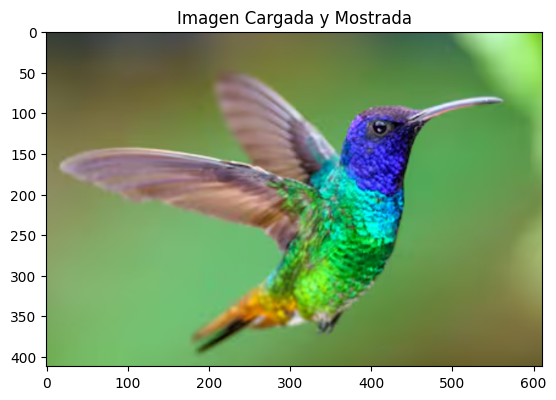

Imagen shape: (412, 611, 3)


In [ ]:
img_test = cargar_imagen('/content/drive/MyDrive/proc. imagen/colibri.PNG')

if img_test is not None:
    mostrar_info_imagen(img_test, "Imagen de Prueba")
    plt.imshow(img_test)
    plt.title("Imagen Cargada y Mostrada")
    plt.show()
    print(f"Imagen shape: {img_test.shape}")

¿Qué son estas dimensiones?

La función data_img nos muestra la forma de la imagen a través de img.shape. Esta tupla nos indica las dimensiones de la imagen. Las dos primeras dimensiones corresponden al alto (height) y al ancho (width) de la imagen, respectivamente. Por ejemplo, si img.shape devuelve (412, 611, 3), significa que la imagen tiene 412 pixeles de alto, 611 pixeles de ancho y 3 canales de color (RGB).

## 2.3 Verificación del Setup

Probá que todo funciona creando una imagen sintética simple:

--- Información de la Imagen: Imagen Sintética ---
Dimensiones: (200, 300)
Tipo de dato: uint8
Valor mínimo: 0
Valor máximo: 254
-----------------------------------------


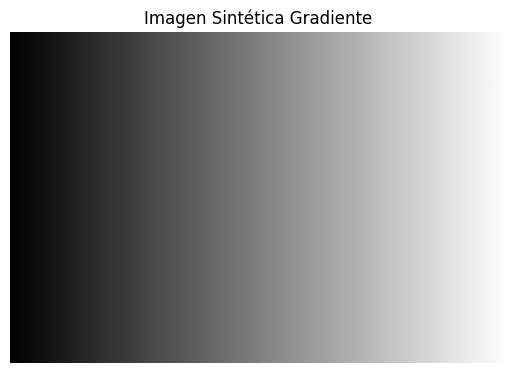

In [ ]:
# Creá una imagen sintética simple (ej: gradiente o patrón)
#Gradiente

synthetic_img = np.zeros((200, 300), dtype=np.uint8)
for i in range(synthetic_img.shape[1]):
    synthetic_img[:, i] = int(255 * (i / synthetic_img.shape[1]))

# Probá tus funciones con esta imagen
mostrar_info_imagen(synthetic_img, "Imagen Sintética")
plt.imshow(synthetic_img, cmap='gray') # Usamos escala de grises
plt.title("Imagen Sintética Gradiente")
plt.axis('off')
plt.show()

---

# PARTE 3: Análisis de Tu Dataset

Ahora vas a trabajar con tu dataset de 3 documentos. Esta parte es clave para entender qué problemas tenés que resolver.

**Preparación del Dataset:**
- Creá una carpeta llamada `dataset/` en la misma ubicación que este notebook
- Incluí exactamente 3 imágenes de documentos:
  1. Una de buena calidad (bien iluminada, recta)
  2. Una rotada o inclinada
  3. Una con problemas (oscura, borrosa, o con sombras)

## 3.1 Carga de las Imágenes

**Material de consulta:** `002/TEO/LeerImagenColor.ipynb`

In [ ]:
# Define las rutas a tus 3 imágenes
rutas_imagenes = [
    "/content/drive/MyDrive/proc. imagen/dataset/derecha.jpg",  # Buena calidad
    "/content/drive/MyDrive/proc. imagen/dataset/para rotar.jpg",  # Rotada
    "/content/drive/MyDrive/proc. imagen/dataset/recortar.jpg"   # Con problemas
]

# Carga las 3 imágenes usando tu función
imagenes = []
nombres = ["Buena Calidad", "Rotada", "Con Problemas"]

# Tu código aquí
for ruta in rutas_imagenes:
    img = cargar_imagen(ruta)
    if img is not None:
        imagenes.append(img)
    else:
        print(f"Saltando imagen en {ruta} debido a un error de carga.") # Translated to Spanish

## 3.2 Inspección Visual y Análisis

**Material de consulta:** `002/Fundamentos_Imagen_Digital.ipynb`

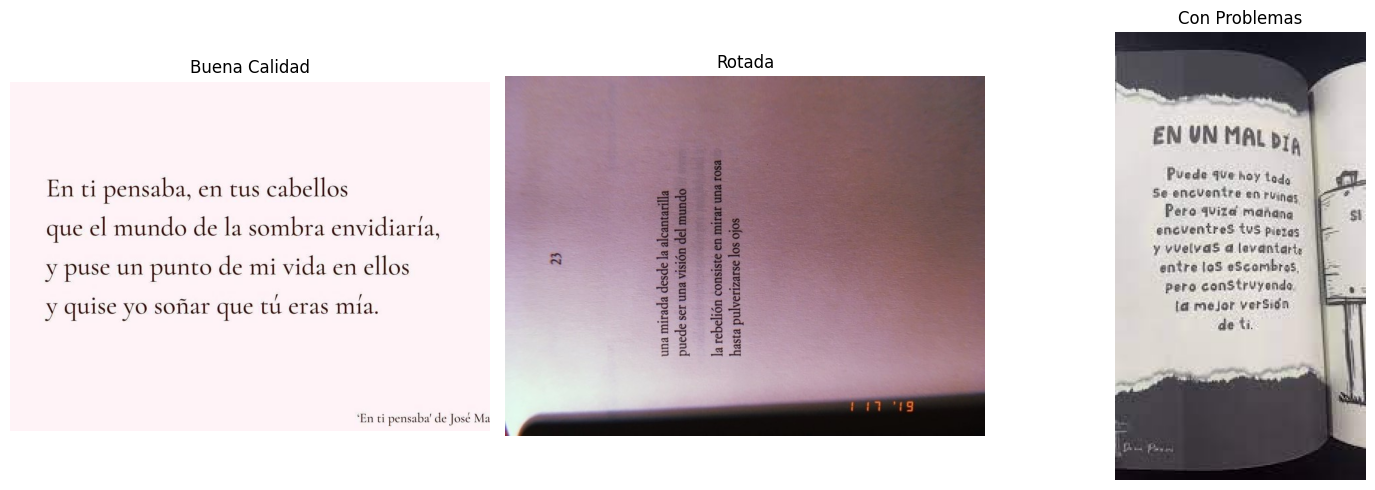

In [ ]:
# Mostra las 3 imágenes lado a lado con sus nombres
# Usa subplots de matplotlib

# --- Mostrar las imágenes lado a lado ---
fig, axes = plt.subplots(1, len(imagenes), figsize=(15, 5)) # 1 fila, N columnas (N=3), tamaño de figura

# Asegurarse de que 'axes' sea siempre un array, incluso si hay solo una imagen
if len(imagenes) == 1:
    axes = [axes]

for i, (img, nombre) in enumerate(zip(imagenes, nombres)):
    axes[i].imshow(img)
    axes[i].set_title(nombre)
    axes[i].axis('off') # Ocultar ejes

plt.tight_layout() # Ajustar el layout para evitar superposiciones
plt.show()

--- Información de la Imagen: Buena Calidad ---
Dimensiones: (744, 1024, 3)
Tipo de dato: uint8
Valor mínimo: 0
Valor máximo: 255
--------------------------------------


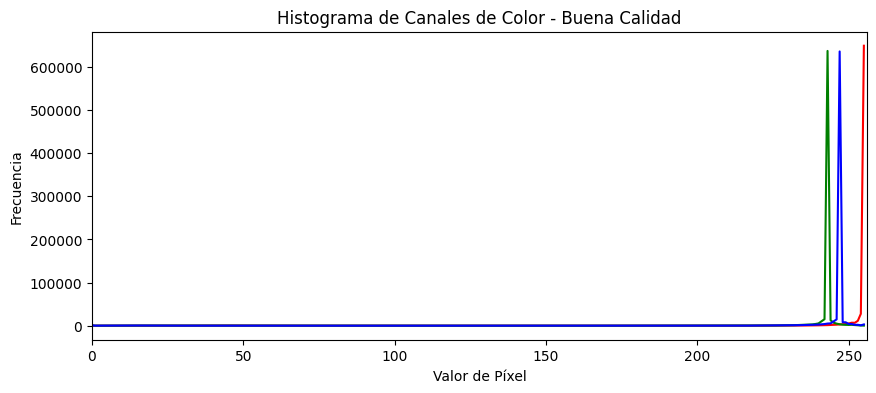

--- Información de la Imagen: Rotada ---
Dimensiones: (540, 720, 3)
Tipo de dato: uint8
Valor mínimo: 0
Valor máximo: 255
-------------------------------


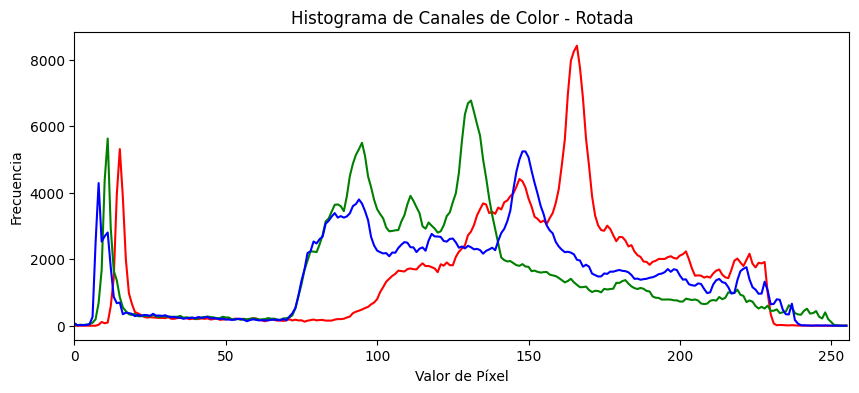

--- Información de la Imagen: Con Problemas ---
Dimensiones: (300, 168, 3)
Tipo de dato: uint8
Valor mínimo: 0
Valor máximo: 255
--------------------------------------


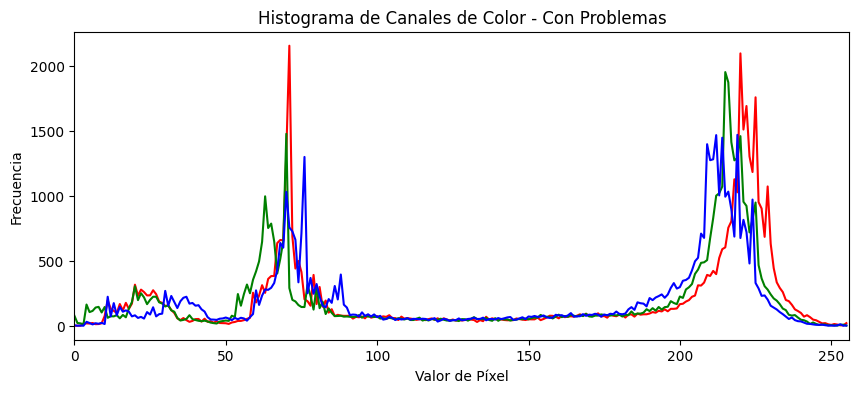

In [ ]:
# Para cada imagen, mostrá información básica y un histograma
# Esto te ayuda a entender los problemas de cada una


for i, (img, nombre) in enumerate(zip(imagenes, nombres)):
    mostrar_info_imagen(img, nombre)

    # Mostrar histograma para cada canal de color si es una imagen a color
    if len(img.shape) == 3 and img.shape[2] == 3:
        plt.figure(figsize=(10, 4))
        colors = ('red', 'green', 'blue')
        for j, color in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        plt.title(f"Histograma de Canales de Color - {nombre}")
        plt.xlabel("Valor de Píxel")
        plt.ylabel("Frecuencia")
        plt.show()
    # Mostrar histograma para imagen en escala de grises
    elif len(img.shape) == 2:
        plt.figure(figsize=(8, 4))
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        plt.plot(hist)
        plt.xlim([0, 256])
        plt.title(f"Histograma - {nombre}")
        plt.xlabel("Valor de Píxel")
        plt.ylabel("Frecuencia")
        plt.show()

## 3.3 Identificación de Problemas

Basándote en tu inspección visual, identificá los problemas principales de cada imagen:

**Imagen 1 (Buena Calidad):**

-Problemas identificados: Bajo contraste, concentración de valores de píxel en el rango alto.
-Preprocessing necesario: Ajuste de contraste (como CLAHE) para distribuir mejor los valores de píxel.

**Imagen 2 (Rotada):**

-Problemas identificados: Muy baja iluminación (oscura), bajo contraste, valores de píxel concentrados en el rango bajo, posible tonalidad de color dominante (rojiza según el histograma).
-Preprocessing necesario: Mejora significativa del contraste y/o brillo. Técnicas como la ecualización de histograma (especialmente CLAHE si hay variaciones locales) o ajustes de brillo/contraste son cruciales aquí. Considerar ajuste de balance de color si la tonalidad afecta la legibilidad.


**Imagen 3 (Con problemas):**

-Problemas identificados: Bajo contraste con valores de píxel concentrados en un rango medio-alto, y una base en valores bajos (posiblemente sombras). Inclinación del documento desigual.
- Preprocessing necesario: Aplicar CLAHE o ecualización para mejorar el contraste y visibilidad de los detalles.  Corrección de la rotación (deskewing) es fundamental.



---

# PARTE 4: Preprocessing Básico

Ahora vas a aplicar técnicas de preprocessing para mejorar cada imagen. Trabajá con una imagen por vez.

## 4.1 Segmentación Básica

Separar el documento del fondo es el primer paso crítico.

**Material de consulta:** `Segmentacion.ipynb` (especialmente las funciones de umbralización)

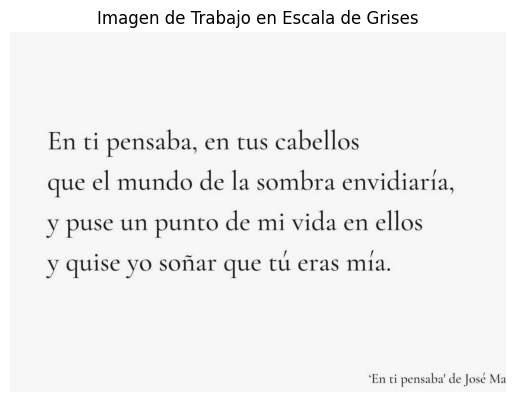

In [ ]:
imagen_trabajo = imagenes[0]  # Usaremos la primera imagen (Buena Calidad) para empezar

# Convertí a escala de grises
# Usaremos la función cv2.cvtColor con el flag COLOR_RGB2GRAY
imagen_gris = cv2.cvtColor(imagen_trabajo, cv2.COLOR_RGB2GRAY)

# Mstramos la imagen en escala de grises para verificar
plt.imshow(imagen_gris, cmap='gray')
plt.title("Imagen de Trabajo en Escala de Grises")
plt.axis('off')
plt.show()

In [ ]:
# Aplicá segmentación por umbralización
# Probá diferentes valores hasta encontrar el mejor


# Aplicar umbralización (thresholding)
# cv2.threshold devuelve dos valores: el umbral usado y la imagen binaria (máscara)
umbral_valor = 180 # Puedes cambiar este valor
_, mascara = cv2.threshold(imagen_gris, umbral_valor, 255, cv2.THRESH_BINARY)

# Para segmentar el documento (el fondo blanco se vuelve negro), podrías necesitar invertir la máscara
mascara = cv2.bitwise_not(mascara) # invertimos


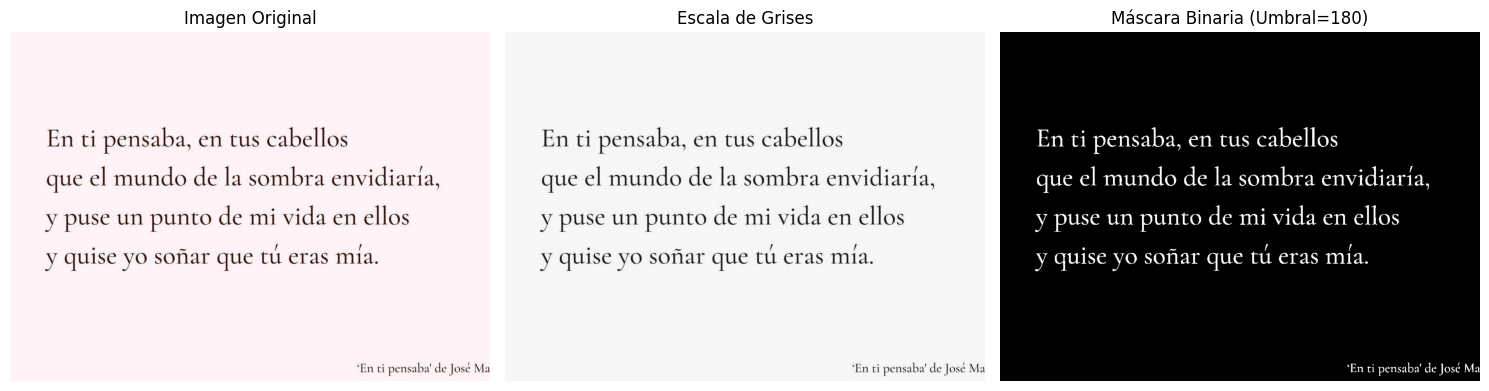

In [ ]:
# Mostrá el resultado: original, escala de grises, y máscara
# Tu código aquí

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # 1 fila, 3 columnas

# Imagen Original
axes[0].imshow(imagen_trabajo)
axes[0].set_title("Imagen Original")
axes[0].axis('off')

# Imagen en Escala de Grises
axes[1].imshow(imagen_gris, cmap='gray')
axes[1].set_title("Escala de Grises")
axes[1].axis('off')

# Máscara Binaria (Resultado de Umbralización)
axes[2].imshow(mascara, cmap='gray') # La máscara es en escala de grises (0 o 255)
axes[2].set_title(f"Máscara Binaria (Umbral={umbral_valor})")
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 4.2 Mejora de Calidad

**Material de consulta:** `Mejora_Imagen_Ecualizacion.ipynb`

CLAHE significa "Contrast Limited Adaptive Histogram Equalization".


Ecualización de Histograma Adaptativa: A diferencia de la ecualización de histograma estándar (que aplica el mismo ajuste a toda la imagen), CLAHE divide la imagen en pequeñas regiones (llamadas "tiles"). Luego, aplica la ecualización de histograma a cada una de estas regiones de forma independiente. Esto es "adaptativo" porque el ajuste se adapta a las características locales de cada parte de la imagen.Limitación de Contraste: La "Contrast Limited" parte significa que CLAHE limita la amplificación del ruido. La ecualización estándar a veces puede hacer que el ruido en áreas uniformes se vuelva muy prominente. CLAHE evita esto limitando cuánto puede aumentar el contraste en cada región.
¿Por qué lo usamos para documentos?

Los documentos a menudo tienen iluminación desigual, sombras o variaciones en el tono del papel. La ecualización estándar podría no mejorar bien estas áreas o incluso empeorarlas. CLAHE, al trabajar en regiones pequeñas, puede mejorar el contraste localmente, haciendo que el texto sea más legible incluso en áreas con poca luz o sombras, sin amplificar demasiado el ruido en otras partes.

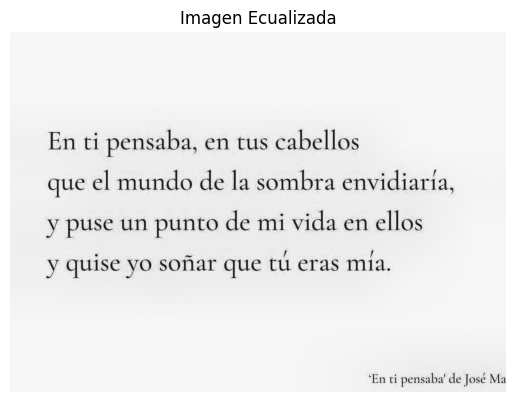

In [ ]:
# Aplicamos CLAHE (Contrast Limited Adaptive Histogram Equalization)
# Crear un objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # Puedes ajustar clipLimit y tileGridSize

# Aplicar CLAHE a la imagen en escala de grises
imagen_ecualizada = clahe.apply(imagen_gris)


# Mostrar la imagen ecualizada para comparar
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title("Imagen Ecualizada")
plt.axis('off')
plt.show()

In [ ]:
# Si tu imagen está rotada, aplicá corrección básica
# Material de consulta: Transformaciones_Geometricas.ipynb

# Tu código aquí


## 4.3 Comparación de Resultados

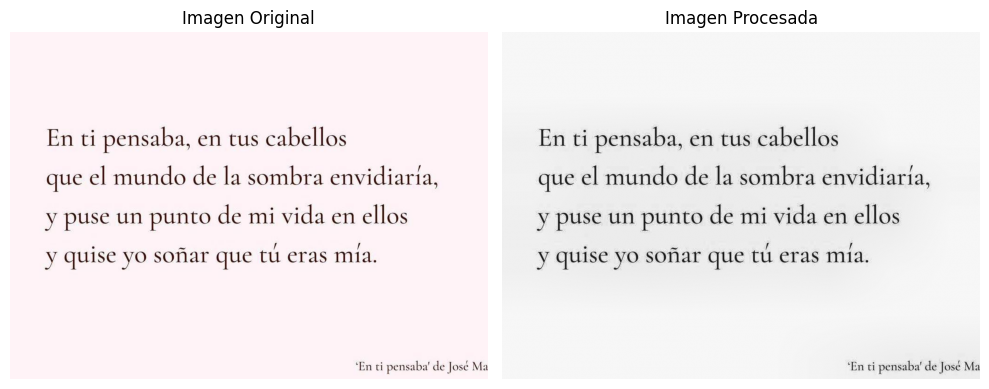

In [ ]:
# Mostrá lado a lado: imagen original vs imagen procesada
# Tu código aquí

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 fila, 2 columnas

# Imagen Original
axes[0].imshow(imagen_trabajo) # imagen_trabajo es la imagen original cargada
axes[0].set_title("Imagen Original")
axes[0].axis('off')

# Imagen Procesada (CLAHE en este caso)
axes[1].imshow(imagen_ecualizada, cmap='gray') # imagen_ecualizada es el resultado de la celda 20 (ahora con CLAHE)
axes[1].set_title("Imagen Procesada")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 4.4 Aplicación a las Otras Imágenes

Repetí el proceso para tus otras 2 imágenes, adaptando las técnicas según los problemas específicos de cada una:

Procesando: Rotada


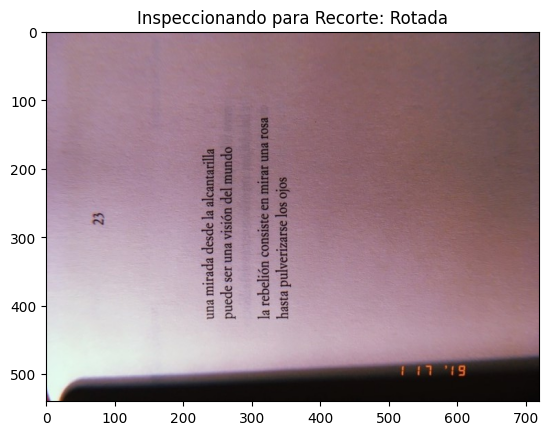

In [ ]:
# Procesamiento de la Segunda Imagen
# Tu código aquí

# Seleccionar la nueva segunda imagen
imagen_trabajo_nueva_2 = imagenes[1]
nombre_imagen_nueva_2 = nombres[1]

print(f"Procesando: {nombre_imagen_nueva_2}")


#Mostrar la imagen con ejes para identificar coordenadas de recorte
plt.imshow(imagen_trabajo_nueva_2)
plt.title(f"Inspeccionando para Recorte: {nombre_imagen_nueva_2}")
plt.axis('on')
plt.show()


Dimensiones de la imagen original: (540, 720, 3)
Dimensiones de la imagen recortada: (350, 200, 3)


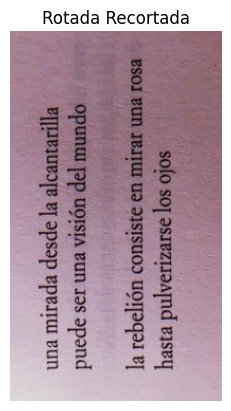

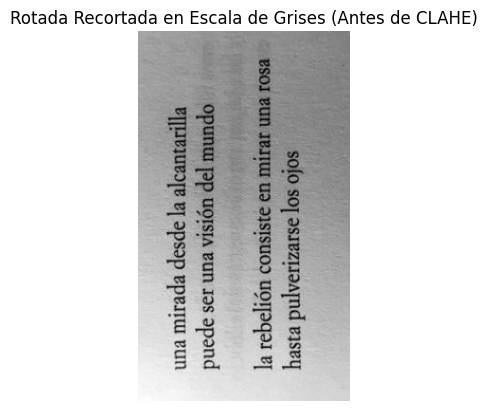

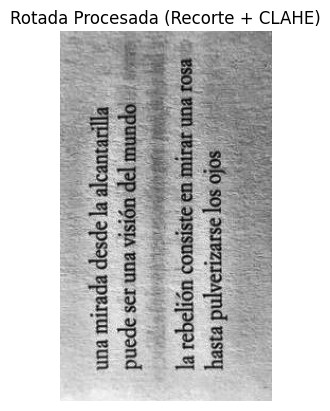

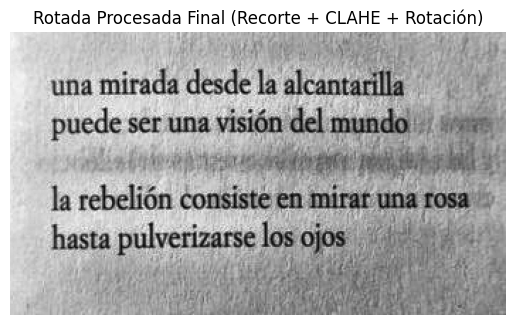

In [ ]:
y_inicio = 100
y_fin = 450
x_inicio = 200
x_fin = 400

imagen_recortada_nueva_2 = imagen_trabajo_nueva_2[y_inicio:y_fin, x_inicio:x_fin]

print(f"Dimensiones de la imagen original: {imagen_trabajo_nueva_2.shape}")
print(f"Dimensiones de la imagen recortada: {imagen_recortada_nueva_2.shape}")

# Mostrar imagen recortada para verificar (descomenta y ejecuta después de recortar)
plt.imshow(imagen_recortada_nueva_2)
plt.title(f"{nombre_imagen_nueva_2} Recortada")
plt.axis('off')
plt.show()


# Usa la imagen recortada para el siguiente paso
imagen_a_procesar_paso2 = imagen_recortada_nueva_2


# 1. Convertir a escala de grises
imagen_gris_nueva_2 = cv2.cvtColor(imagen_a_procesar_paso2, cv2.COLOR_RGB2GRAY)

# Mostrar imagen en gris (de la imagen recortada)
plt.imshow(imagen_gris_nueva_2, cmap='gray')
plt.title(f"{nombre_imagen_nueva_2} Recortada en Escala de Grises (Antes de CLAHE)")
plt.axis('off')
plt.show()

# 2. Aplicar CLAHE para mejorar contraste
clahe_nueva_2 = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
imagen_procesada_nueva_2 = clahe_nueva_2.apply(imagen_gris_nueva_2)

# Mostrar imagen procesada con CLAHE (de la imagen recortada y gris)
plt.imshow(imagen_procesada_nueva_2, cmap='gray')
plt.title(f"{nombre_imagen_nueva_2} Procesada (Recorte + CLAHE)")
plt.axis('off')
plt.show()

# --- Paso de Rotación ---
# Aplicar rotación vertical a la derecha (90 grados en sentido horario)
imagen_rotada_final_nueva_2 = cv2.rotate(imagen_procesada_nueva_2, cv2.ROTATE_90_CLOCKWISE)

# Mostrar imagen procesada final con rotación
plt.imshow(imagen_rotada_final_nueva_2, cmap='gray')
plt.title(f"{nombre_imagen_nueva_2} Procesada Final (Recorte + CLAHE + Rotación)")
plt.axis('off')
plt.show()



Procesando: Con Problemas


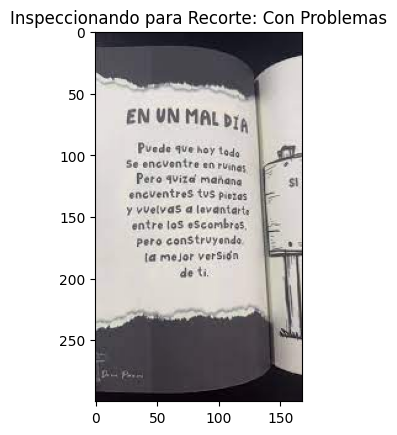

In [ ]:
# Procesamiento de la Tercera Imagen
# Tu código aquí

# Seleccionar la nueva tercera imagen
imagen_trabajo_3 = imagenes[2]
nombre_imagen_3 = nombres[2]

print(f"Procesando: {nombre_imagen_3}")


# Mostrar la imagen con ejes para identificar coordenadas de recorte
plt.imshow(imagen_trabajo_3)
plt.title(f"Inspeccionando para Recorte: {nombre_imagen_3}")
plt.show()


Dimensiones de la imagen original: (300, 168, 3)
Dimensiones de la imagen recortada: (140, 115, 3)


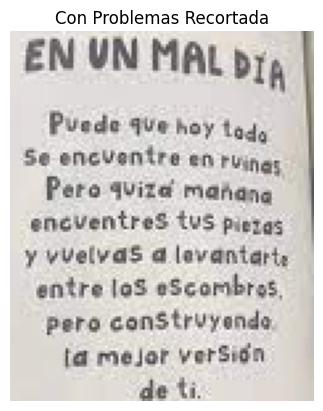

In [ ]:
y_inicio = 60
y_fin = 200
x_inicio = 20
x_fin = 135

imagen_recortada_3 = imagen_trabajo_3[y_inicio:y_fin, x_inicio:x_fin]

print(f"Dimensiones de la imagen original: {imagen_trabajo_3.shape}")
print(f"Dimensiones de la imagen recortada: {imagen_recortada_3.shape}")

# Mostrar imagen recortada para verificar
plt.imshow(imagen_recortada_3)
plt.title(f"{nombre_imagen_3} Recortada")
plt.axis('off')
plt.show()


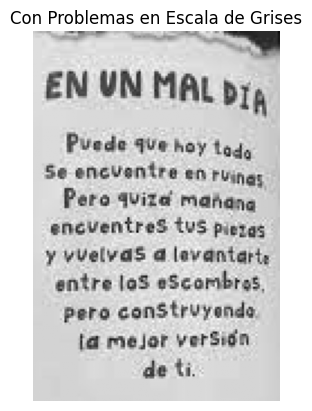

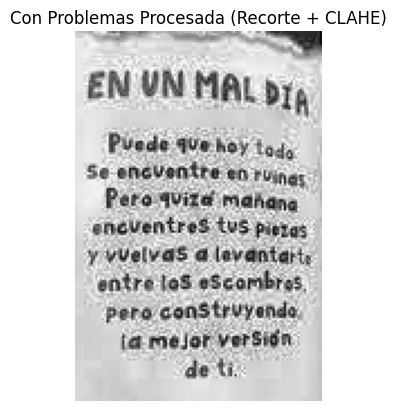

In [ ]:
# 1. Convertir a escala de grises
imagen_gris_3 = cv2.cvtColor(imagen_a_procesar_paso3, cv2.COLOR_RGB2GRAY)

# Mostrar imagen en gris
plt.imshow(imagen_gris_3, cmap='gray')
plt.title(f"{nombre_imagen_3} en Escala de Grises")
plt.axis('off')
plt.show()

clahe_nueva_3 = cv2.createCLAHE(clipLimit=0.5,     # Ajusta este valor (ej: 1.0, 1.5)
                                tileGridSize=(100,100)) # Ajusta este valor (ej: (16,16), (32,32))
imagen_procesada_3 = clahe_3.apply(imagen_gris_3)

# Mostrar imagen procesada final
plt.imshow(imagen_procesada_3, cmap='gray')
plt.title(f"{nombre_imagen_3} Procesada (Recorte + CLAHE)")
plt.axis('off')
plt.show()

## 4.5 Resultados Finales

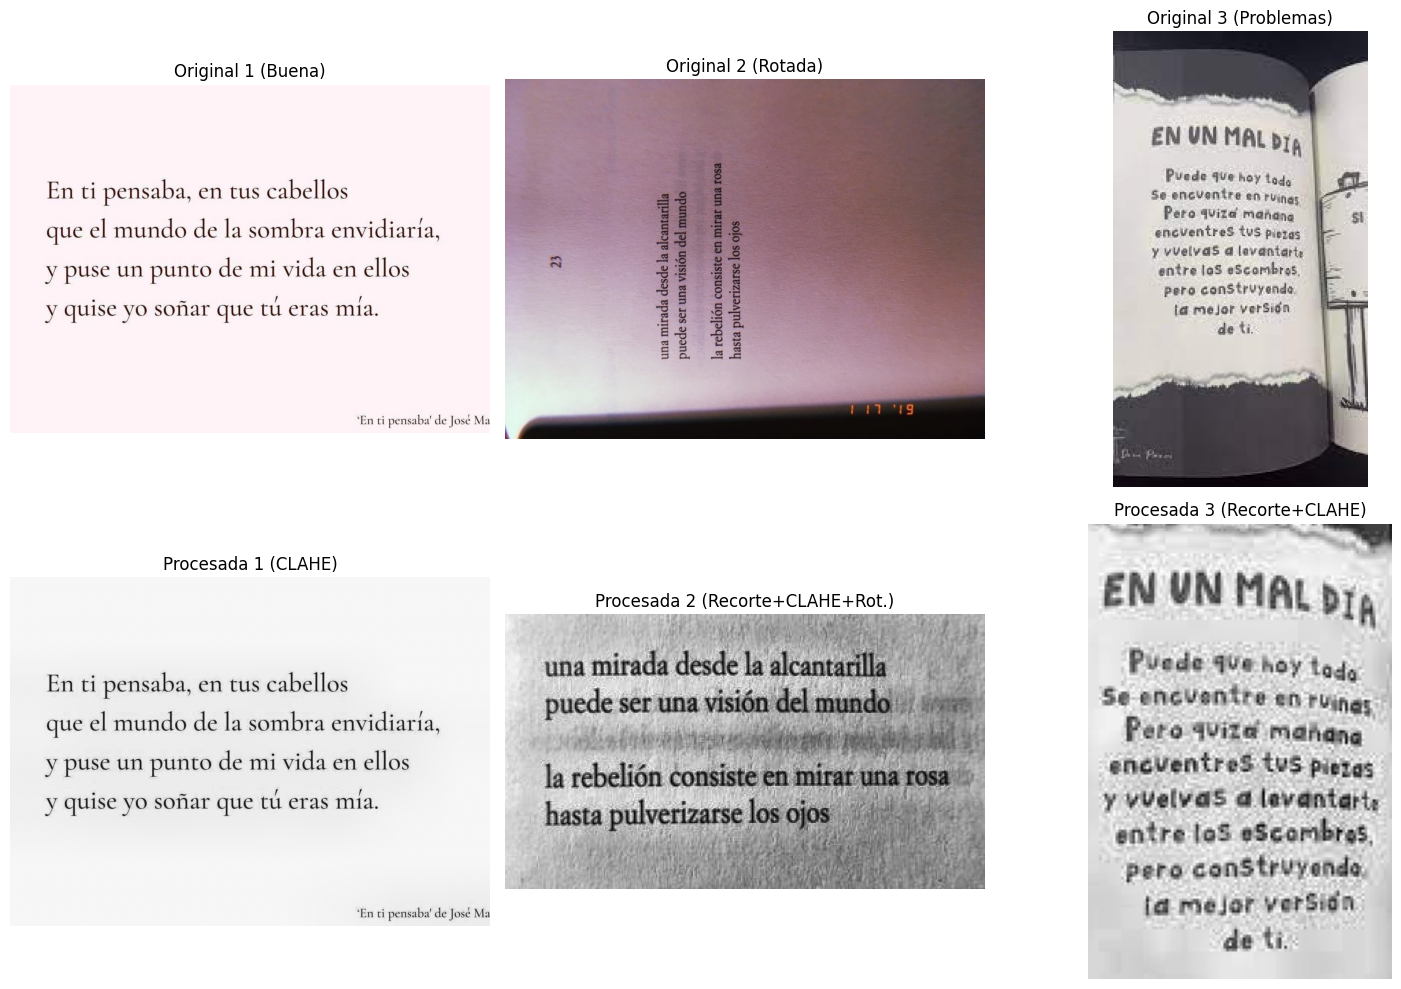

In [212]:
# Creá un grid mostrando las 3 imágenes originales y las 3 procesadas

# Crear una lista de imágenes originales y procesadas para mostrar
imagenes_originales = [imagenes[0], imagenes[1], imagenes[2]]
imagenes_procesadas = [imagen_ecualizada, imagen_rotada_final_nueva_2, imagen_procesada_nueva_3]

# Actualiza los nombres para reflejar el procesamiento actual de cada imagen
nombres_originales = ["Original 1 (Buena)", "Original 2 (Rotada)", "Original 3 (Problemas)"] # Mantienen el orden original del dataset
nombres_procesadas = ["Procesada 1 (CLAHE)", "Procesada 2 (Recorte+CLAHE+Rot.)", "Procesada 3 (Recorte+CLAHE)"] # Nombres según el procesamiento aplicado


fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # 2 filas (original vs procesada), 3 columnas (una por imagen)

# Mostrar imágenes originales en la primera fila
for i in range(3):
    axes[0, i].imshow(imagenes_originales[i])
    axes[0, i].set_title(nombres_originales[i])
    axes[0, i].axis('off')

# Mostrar imágenes procesadas en la segunda fila
for i in range(3):
    # Asegurarse de mostrar las imágenes en escala de grises si son el resultado de procesamiento en gris
    cmap = 'gray' if len(imagenes_procesadas[i].shape) == 2 else None
    axes[1, i].imshow(imagenes_procesadas[i], cmap=cmap)
    axes[1, i].set_title(nombres_procesadas[i])
    axes[1, i].axis('off')

plt.tight_layout() # Ajustar el layout
plt.show()

---

# REFLEXIÓN FINAL

## Análisis de Resultados


**¿Qué desafíos encontraste durante el procesamiento?**

Sin dudas la tercera imagen fue la más compleja, el hecho de que este torcida de manera irregular dificulta poder escuadrarla.

**¿En qué casos los resultados no fueron óptimos y por qué?**

En la Imagen tres, por lo anteriormente mencionado. De hecho en vez de mejorarla la empeoraba así que directamente eliminé esa parte del código.
La ecualización tampoco me convenció del todo.

## Aprendizaje Adquirido

**¿Qué conceptos del curso fueron más útiles?**

Si bien no lo implemente me parecieron útiles conceptos como cambio de perspectiva y detección de bordes.

**¿Cómo podrías mejorar este sistema en futuras versiones?**

Se me ocurre tal vez recortar imágenes de manera automática sin tener que configurar manualmente los parámetros.

---

## Entregables

1. Este notebook completamente ejecutado con resultados
2. Carpeta `dataset/` con tus 3 imágenes
3. Las reflexiones completadas

**Fecha de entrega:** 24 de Septiembre, 23:59

---